<a href="https://colab.research.google.com/github/sankardevisharath/amex-default-prediction/blob/master/notebooks/explore_columns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Dataset Column Wise

## Load Data From Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%mkdir data
%cd data
%mkdir raw
%cd raw

/content/data
/content/data/raw


In [4]:
!cp /content/drive/MyDrive/amex-default-prediction/data/raw/amex-default-prediction.zip .

In [5]:
!unzip amex-default-prediction.zip train_data.csv

Archive:  amex-default-prediction.zip
  inflating: train_data.csv          


In [6]:
!unzip amex-default-prediction.zip train_labels.csv

Archive:  amex-default-prediction.zip
  inflating: train_labels.csv        


## Setup Environment

In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
TRAIN_DATA_PATH = '/content/data/raw/train_data.csv'
TRAIN_LABELS_PATH = '/content/data/raw/train_labels.csv'

## Explore Column Metadata

Load train labels dataframe

In [9]:
train_labels = pd.read_csv(TRAIN_LABELS_PATH)

In [10]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


There are two columns in the train_labels file, customer_ID of the customer & target variable. Target variable is of type int64.

Below utility function can be used to merge target column to another dataframe.

In [11]:
def append_label(source_df):
  return pd.merge(left=source_df, right=train_labels, how='inner')

Read 10 rows from the training data to check the object types and column names.

In [12]:
pd.read_csv(TRAIN_DATA_PATH, nrows=10).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 15.0+ KB


There are 185 float64, 4 Object, 1 int64 columns. Now let us take all the columns and corresponding dtype into a variable.

In [12]:
columns = pd.read_csv(TRAIN_DATA_PATH, nrows=10).dtypes

In [ ]:
columns[columns==object]

customer_ID    object
S_2            object
D_63           object
D_64           object
dtype: object

There customer_ID, S_2, D_63, D_64 are the columns with datatype object. Lets check each column. 

## Customer ID, Statment Date & Label 

### Customer ID

In [ ]:
cust_id_stmt_date_df = pd.read_csv(TRAIN_DATA_PATH, usecols=['customer_ID', 'S_2'])

In [ ]:
cust_id_stmt_date_df.shape

(Delayed('int-7c598bdb-9c0f-43ab-8013-e869d979bfa7'), 2)

In [ ]:
cust_id_stmt_date_df = append_label(cust_id_stmt_date_df)

In [ ]:
cust_id_stmt_date_df.shape

(5531451, 3)

In [ ]:
cust_id_stmt_date_df.head(5)

,customer_ID,S_2,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0


In [ ]:
cust_id_stmt_date_df['customer_ID'].nunique()

458913

There are around half million unique customers in the train data set

In [ ]:
cust_id_stmt_date_df.isna().sum()

customer_ID    0
S_2            0
target         0
dtype: int64

None of the columns are NAN in these 3 columns.

In [ ]:
cust_id_len = cust_id_stmt_date_df.customer_ID.str.len().max()
print(f'Maximum size of value in customer_id column is {cust_id_len}')
print(f'Total size of column customer_id is {round(cust_id_len * cust_id_stmt_date_df.shape[0]/(1024 * 1024), 2)} MB')

Maximum size of value in customer_id column is 64
Total size of column customer_id is 337.61 MB


In [ ]:
s_2_len = cust_id_stmt_date_df.S_2.str.len().max()
print(f'Maximum size of value in customer_id column is {s_2_len}')
print(f'Total size of column S_2 is {round(s_2_len * cust_id_stmt_date_df.shape[0]/(1024 * 1024), 2)} MB')

Maximum size of value in customer_id column is 10
Total size of column S_2 is 52.75 MB


In [ ]:
print(f'Total size of column target is {round(8 * cust_id_stmt_date_df.shape[0]/(1024 * 1024), 2)} MB')

Total size of column target is 42.2 MB


In [ ]:
cust_id_stmt_date_df["S_2"] = pd.to_datetime(cust_id_stmt_date_df["S_2"])

### Distribution of target variable

In [ ]:
target_dist = cust_id_stmt_date_df.target.value_counts()
target_dist = target_dist.transform(lambda x: (x/x.sum()).mul(100))

Text(0, 0.5, 'Percentage (%)')

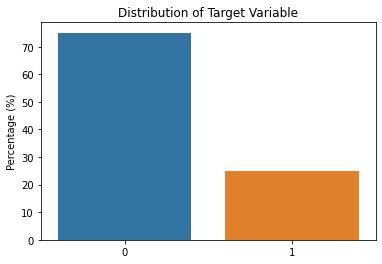

In [ ]:
ax = sns.barplot(x=target_dist.index, y=target_dist.values)
plt.title('Distribution of Target Variable')
plt.ylabel('Percentage (%)')

The dataset has 25% positive ( defaults on payment) & 75% negative cases. We might have to consider this imbalance while building the model.
### Statment Date Analysis

In [ ]:
print(f'Minimum date is {cust_id_stmt_date_df.S_2.min()}')
print(f'Maxim date is {cust_id_stmt_date_df.S_2.max()}')

Minimum date is 2017-03-01 00:00:00
Maxim date is 2018-03-31 00:00:00


The data contains entries for 13 months. We have data in March from year 2017 & 2018. 

In [ ]:
stmt_dt_dist = pd.Series(cust_id_stmt_date_df.S_2.dt.to_period('M')).value_counts(sort=True)
stmt_dt_dist

2018-03    458913
2018-02    452781
2018-01    446255
2017-12    438910
2017-11    434268
2017-10    430292
2017-09    425455
2017-08    421099
2017-07    415602
2017-06    410384
2017-04    401556
2017-05    400306
2017-03    395630
Freq: M, Name: S_2, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

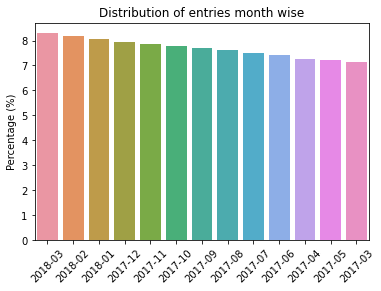

In [ ]:
stmt_dt_dist = stmt_dt_dist.transform(lambda x: (x/x.sum()).mul(100))
ax = sns.barplot(x=stmt_dt_dist.index, y=stmt_dt_dist.values)
plt.title('Distribution of entries month wise')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

Each month contains around 7% to 8% of the complete dataset.

In [ ]:
del stmt_dt_dist
stmt_dt_dist = cust_id_stmt_date_df.copy()
stmt_dt_dist.head()

,customer_ID,S_2,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0


In [ ]:
stmt_dt_dist['S_2'] = cust_id_stmt_date_df.S_2.dt.to_period('M')
stmt_dt_dist.head()

,customer_ID,S_2,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07,0


In [ ]:
month_target_grp = stmt_dt_dist.groupby(['S_2', 'target']).count()
month_target_grp = month_target_grp.reset_index()
month_target_grp.head()

,S_2,target,customer_ID
0,2017-03,0,303837
1,2017-03,1,91793
2,2017-04,0,306650
3,2017-04,1,94906
4,2017-05,0,304710
5,2017-05,1,95596
6,2017-06,0,310850
7,2017-06,1,99534
8,2017-07,0,313413
9,2017-07,1,102189


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

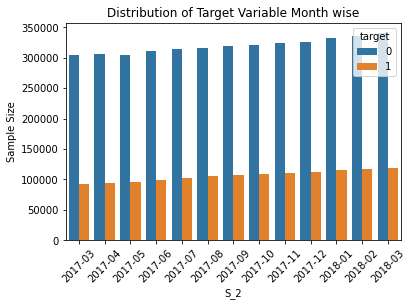

In [ ]:
sns.barplot(x=month_target_grp.S_2,y=month_target_grp.customer_ID,
                 hue=month_target_grp.target, data=month_target_grp)
plt.title('Distribution of Target Variable Month wise')
plt.ylabel('Sample Size')
plt.xticks(rotation=45)

Each month contains approximately 300,000 customers who are non defaulting and 90,000 customers who defaults on loan. This is approximately in the ratio 3:1 ratio. Also we can see that the number of customers are increasing slightly every month.

In [ ]:
del month_target_grp, stmt_dt_dist

In [ ]:
stmt_dt_dist = cust_id_stmt_date_df.copy()
stmt_dt_dist['S_2'] = cust_id_stmt_date_df.S_2.dt.dayofweek
stmt_dt_dist.head()


,customer_ID,S_2,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,3,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,4,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,1,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6,0


In [ ]:
month_target_grp = stmt_dt_dist.groupby(['S_2', 'target']).count()
month_target_grp = month_target_grp.reset_index()
month_target_grp

,S_2,target,customer_ID
0,0,0,593291
1,0,1,194271
2,1,0,592403
3,1,1,198204
4,2,0,596923
5,2,1,198874
6,3,0,595929
7,3,1,199132
8,4,0,614962
9,4,1,202729


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

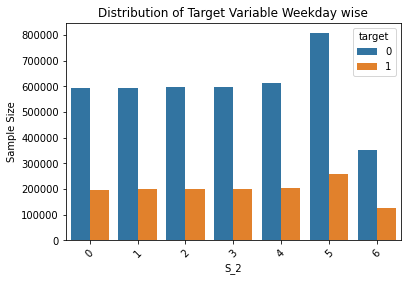

In [ ]:
sns.barplot(x=month_target_grp.S_2,y=month_target_grp.customer_ID,
                 hue=month_target_grp.target, data=month_target_grp)
plt.title('Distribution of Target Variable Weekday wise')
plt.ylabel('Sample Size')
plt.xticks(rotation=45)

Highest number of statements are sent on Saturday and Sunday only very few statements are sent.

In [ ]:
  columns[columns==np.int64]

## D_63

From the description of the problem, these two columns are categorical.

In [13]:
d_63_64_df = pd.read_csv(TRAIN_DATA_PATH, usecols=['customer_ID','D_63', 'D_64', 'S_2'])

In [14]:
d_63_64_df = append_label(d_63_64_df)

In [ ]:
d_63_64_df.shape

(5531451, 5)

In [ ]:
d_63_64_df['D_63'].nunique()

6

In [ ]:
d_63_64_df['D_63'].unique()

array(['CR', 'CO', 'CL', 'XZ', 'XM', 'XL'], dtype=object)

In [ ]:
d_63_64_df['D_63'].isnull().sum()

0

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

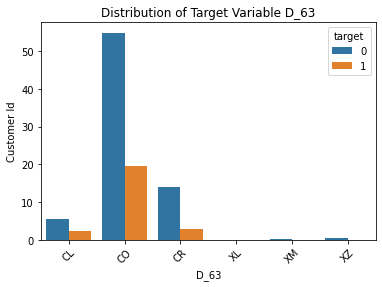

In [40]:
grp = d_63_64_df.groupby(by=['D_63', 'target']).count()
grp = grp.reset_index()
grp['Percentage'] = 100 * grp['customer_ID'] / grp['customer_ID'].sum()
sns.barplot(x=grp.D_63,y=grp.Percentage,
                 hue=grp.target, data=grp)
plt.title('Distribution of Target Variable D_63')
plt.ylabel('Customer Id')
plt.xticks(rotation=45)

Most of the variables are of category 'CO'.

In [ ]:
d_63_64_df['D_64'].nunique()

4

In [ ]:
d_63_64_df['D_64'].unique()

array(['O', 'R', nan, 'U', '-1'], dtype=object)

In [ ]:
d_63_64_df['D_64'].isnull().sum()

217442

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

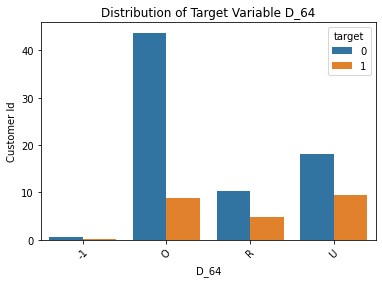

In [41]:
del grp 
grp = d_63_64_df.groupby(by=['D_64', 'target'], dropna=False).count()
grp = grp.reset_index()
grp['Percentage'] = 100 * grp['customer_ID'] / grp['customer_ID'].sum()
sns.barplot(x=grp.D_64,y=grp.Percentage,
                 hue=grp.target, data=grp)
plt.title('Distribution of Target Variable D_64')
plt.ylabel('Customer Id')
plt.xticks(rotation=45)

## Explore all the categorical columns

In [ ]:
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_66', 'D_68']
cols = ['customer_ID', 'S_2']
cols = cols.extend(cat_cols)
cat_df = pd.read_csv(TRAIN_DATA_PATH, usecols=cols)
cat_df = append_label(d_63_64_df)

In [ ]:
fig, axs = plt.subplots(2, int(len(cat_cols)/2))

for col in cat_cols:
  del grp
  grp = d_63_64_df.groupby(by=[col, 'target'], dropna=False).count()
  grp = grp.reset_index()
  grp['Percentage'] = 100 * grp['customer_ID'] / grp['customer_ID'].sum()
  sns.barplot(x=grp.D_64,y=grp.Percentage,
                 hue=grp.target, data=grp)
  plt.title('Distribution of Target Variable ' + col)
  plt.ylabel('Customer Id')
  plt.xticks(rotation=45)